In [1]:
from sklearn.datasets import fetch_openml


In [2]:
X, y = fetch_openml('mnist_784', version=1, as_frame=True, return_X_y=True)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

In [5]:
train_perc = 0.7

In [8]:
train_limit = int(X.shape[0] * train_perc)

In [9]:
X_train, X_test, y_train, y_test = X[:train_limit], X[train_limit:], y[:train_limit], y[train_limit:]

In [11]:
y_train.iloc[-1]

'6'

Build a classifier that differentiates digit 6 from digit 9.
Steps to be followed
1. Collect all digit-6 (Positive class) and digit-9 (Negative class) images from x_train and stack them properly as a single datamatrix x_train_69.
2. Keep all digit-6 images from index 0 to i followed by digit-9 images from index i+1 to n (i denotes the end index of digit-6 images)
3. Similarly, collect the respective labels and store it in a variable y_train_69
4. Set the label values to 1 for positive classes and 0 for negative classes.
5. Load from sklearn.utils import shuffle
6. Shuffle the datamatrix and labels. (Set random_state value to 1729).
7. Create x_test_69 and y_test_69 by repeating the steps from 1 to 6 with required modifications.

What is the sum of all the labels in the vector y_train_69.

Hint:-
Use X-train, y_train as input to get  x_train_69 and y_train_69 and
X_test , y_test as input  to get  x_test_69 and y_test_69

In [12]:
import pandas as pd

# Collect indices of digit-6 images
ind_train_6 = y_train[y_train == '6'].index
# Collect indices of digit-9 images
ind_train_9 = y_train[y_train == '9'].index

# Extract digit-6 and digit-9 images and stack them
x_train_6 = X_train.loc[ind_train_6, :]
x_train_9 = X_train.loc[ind_train_9, :]
x_train_69 = pd.concat([x_train_6, x_train_9])


In [13]:
# prompt: Keep all digit-6 images from index 0 to i followed by digit-9 images from index i+1 to n (i denotes the end index of digit-6 images)
# Similarly, collect the respective labels and store it in a variable y_train_69

# Extract labels of digit-6 and digit-9 images and stack them
y_train_6 = pd.DataFrame(data=[1] * x_train_6.shape[0], index=ind_train_6, columns=['class'])
y_train_9 = pd.DataFrame(data=[0] * x_train_9.shape[0], index=ind_train_9, columns=['class'])
y_train_69 = pd.concat([y_train_6, y_train_9])


In [14]:
# Set label values to 1 for positive classes and 0 for negative classes
y_train_69['class'] = y_train_69['class'].replace({'6': 1, '9': 0}) # Assuming '6' is positive and '9' is negative


In [15]:
# prompt: Load from sklearn.utils import shuffle
# Shuffle the datamatrix and labels. (Set random_state value to 1729).
# Create x_test_69 and y_test_69 by repeating the steps from 1 to 6 with required modifications.

from sklearn.utils import shuffle
x_train_69, y_train_69 = shuffle(x_train_69, y_train_69, random_state=1729)

# Repeat the steps for test data
ind_test_6 = y_test[y_test == '6'].index
ind_test_9 = y_test[y_test == '9'].index

x_test_6 = X_test.loc[ind_test_6, :]
x_test_9 = X_test.loc[ind_test_9, :]
x_test_69 = pd.concat([x_test_6, x_test_9])

y_test_6 = pd.DataFrame(data=[1] * x_test_6.shape[0], index=ind_test_6, columns=['class'])
y_test_9 = pd.DataFrame(data=[0] * x_test_9.shape[0], index=ind_test_9, columns=['class'])
y_test_69 = pd.concat([y_test_6, y_test_9])

x_test_69, y_test_69 = shuffle(x_test_69, y_test_69, random_state=1729)


In [16]:
y_train_69.sum()

class    4855
dtype: int64

In [17]:
y_test_69.sum()

class    2021
dtype: int64

In [18]:
# prompt: Apply StandardScaler to all the training samples in x_train_69 and store the result in another variable (say, x_train_69Tf)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_69Tf = scaler.fit_transform(x_train_69)


In [19]:
x_train_69Tf[0].mean()

0.08128379559427992

In [20]:
x_train_69Tf[:, 0].mean()

0.0

In [23]:
x_train_69Tf[0].std()

0.735882322603775

In [22]:
x_train_69Tf[:, 0].std()

0.0

In [36]:
import sklearn
sklearn.__version__

'1.3.2'

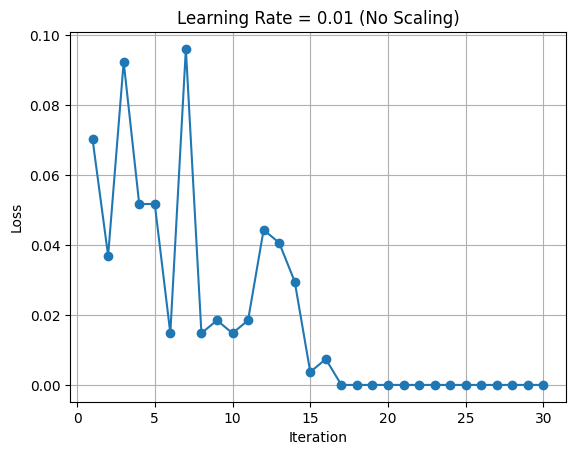

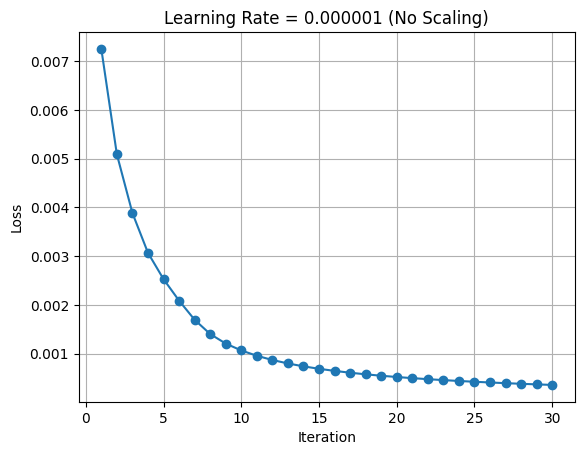

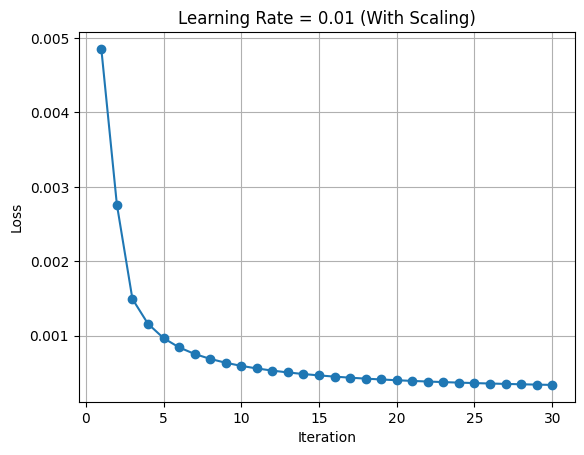

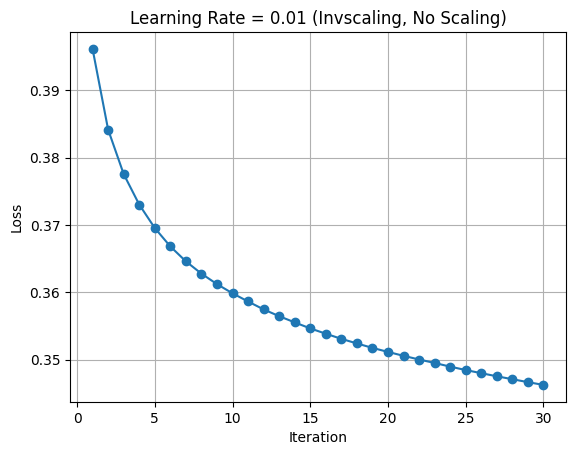

Is Loss Decreasing Monotonically:
A. False
B. True
C. True
D. True


In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
import sklearn
import warnings

# Ensure compatibility with sklearn version
if sklearn.__version__ < "0.24":
    warnings.warn("This code requires scikit-learn version 0.24 or higher.", UserWarning)

# Function to train the model and capture the loss
def train_and_capture_loss(x_train, y_train, learning_rate, learning_rate_strategy='constant', power_t=0.5, scale=False):
    if scale:
        scaler = StandardScaler()
        x_train = scaler.fit_transform(x_train)

    model = SGDClassifier(loss='log_loss', learning_rate=learning_rate_strategy, eta0=learning_rate, power_t=power_t, random_state=10, max_iter=1, warm_start=True)
    losses = []

    for _ in range(30):
        model.partial_fit(x_train, y_train, classes=np.unique(y_train))
        # SGDClassifier does not have a direct loss attribute; we approximate the loss using log loss on the training set
        y_pred_proba = model.predict_proba(x_train)
        loss = sklearn.metrics.log_loss(y_train, y_pred_proba)
        losses.append(loss)

    return losses

# Plotting function
def plot_losses(losses, title):
    plt.plot(range(1, 31), losses, marker='o')
    plt.title(title)
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.grid()
    plt.show()

# A. Set Learning rate : 0.01 and plot the curve and fit the model with x_train_69
losses_a = train_and_capture_loss(x_train_69, y_train_69.values.ravel(), learning_rate=0.01)
plot_losses(losses_a, 'Learning Rate = 0.01 (No Scaling)')

# B. Set learning rate to 0.000001 and fit the model with x_train_69
losses_b = train_and_capture_loss(x_train_69, y_train_69.values.ravel(), learning_rate=0.000001)
plot_losses(losses_b, 'Learning Rate = 0.000001 (No Scaling)')

# C. Keep the learning rate as 0.01. Scale the samples using StandardScaler() and fit the model with the pre-processed samples
losses_c = train_and_capture_loss(x_train_69, y_train_69.values.ravel(), learning_rate=0.01, scale=True)
plot_losses(losses_c, 'Learning Rate = 0.01 (With Scaling)')

# D. Use the "invscaling" strategy for the learning rate with power_t = 1. Fit the model with x_train_69 (without pre-processing)
losses_d = train_and_capture_loss(x_train_69, y_train_69.values.ravel(), learning_rate=0.001, learning_rate_strategy='invscaling', power_t=1.0)
plot_losses(losses_d, 'Learning Rate = 0.01 (Invscaling, No Scaling)')

# Check for monotonic decrease
def is_monotonic(losses):
    return all(x >= y for x, y in zip(losses, losses[1:]))

print("Is Loss Decreasing Monotonically:")
print(f"A. {is_monotonic(losses_a)}")
print(f"B. {is_monotonic(losses_b)}")
print(f"C. {is_monotonic(losses_c)}")
print(f"D. {is_monotonic(losses_d)}")

In [47]:
# prompt: Create the classifier with the following settings
# 1. No Regularization
# 2. eta0 = 0.5
# 3. learning_rate = 'inv_scaling'
# 4. power_t = 0.5
# 5. iterations = 10
# 6. Shuffle = True
# 7. random_state = 10

clf = SGDClassifier(loss='log_loss', eta0=0.5, learning_rate='invscaling',
                    power_t=0.5, max_iter=10, shuffle=True, random_state=10)


In [48]:
# prompt: Train the classifier with x_train_69. Answer the following questions?
# How many false positives (FP) are there in the predictions made on training samples?

clf.fit(x_train_69, y_train_69.values.ravel())

y_train_pred = clf.predict(x_train_69)

# Calculate False Positives (FP)
FP = np.sum((y_train_pred == 1) & (y_train_69.values.ravel() == 0))

print("False Positives (FP):", FP)


False Positives (FP): 8


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


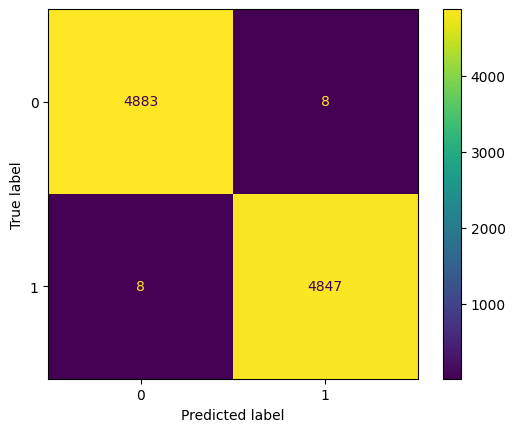

In [49]:
# prompt: confusion matrix display

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_train_69, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


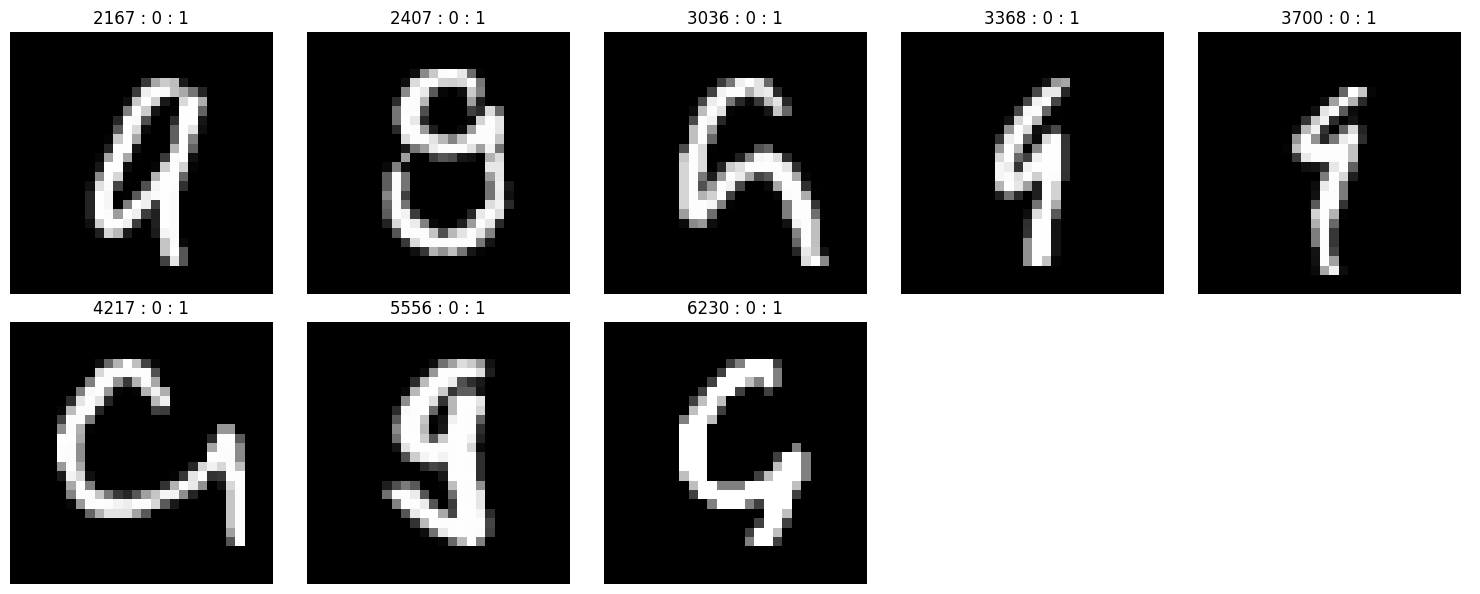

Indices of False Positive Samples (Ascending Order): [2167 2407 3036 3368 3700 4217 5556 6230]
First Index: 2167


In [56]:
# prompt: Display all the False Positive samples.Could a human recognize them correctly?. Get the index of all FP samples in ascending order. Enter the first index.

# Get indices of false positives
fp_indices = np.where((y_train_pred == 1) & (y_train_69.values.ravel() == 0))[0]

# Display false positive samples
fig, axes = plt.subplots(nrows=len(fp_indices) // 5 + 1, ncols=5, figsize=(15, 3 * (len(fp_indices) // 5 + 1)))
for i, idx in enumerate(fp_indices):
    row = i // 5
    col = i % 5
    axes[row, col].imshow(x_train_69.iloc[idx].values.reshape(28, 28), cmap='gray')
    axes[row, col].set_title(f'{idx} : {y_train_69.values[idx][0]} : {y_train_pred[idx]}')
    axes[row, col].axis('off')

# Hide any unused subplots
for i in range(len(fp_indices), (len(fp_indices) // 5 + 1) * 5):
    row = i // 5
    col = i % 5
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

# Get indices of false positives in ascending order
fp_indices_sorted = np.sort(fp_indices)
print("Indices of False Positive Samples (Ascending Order):", fp_indices_sorted)

# Print the first index
print("First Index:", fp_indices_sorted[0])


In [57]:
# prompt: Load the train subset of '20newsgroups' data.
#   Vectorize the data using TfidfVectorizer. Which of the following options represent the shape of the fitted and transformed dataset??

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the train subset of '20newsgroups' data
newsgroups_train = fetch_20newsgroups(subset='train')

# Vectorize the data using TfidfVectorizer
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(newsgroups_train.data)

# Print the shape of the fitted and transformed dataset
print(vectors.shape)  # Output: (11314, 130107)


(11314, 130107)


In [58]:
# prompt: Split the training subset of fetch_20newsgroups data into train and validation sets using train_test_split with test_size = 0.3 and random_state = 0.
# Use MultinomialNB to train the model.
# Compute score on validation set.

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    vectors, newsgroups_train.target, test_size=0.3, random_state=0
)

# Train a Multinomial Naive Bayes model
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Compute the score on the validation set
score = clf.score(X_val, y_val)
print("Validation set score:", score)


Validation set score: 0.8427098674521355


In [59]:
# prompt: Step 1: Download the dataset using following link: (https://drive.google.com/file/d/1v-uxWEgTI0GDCOTZOX3shUMkTf1a_CL7/view?usp=sharing)
# Step 2: Import the data in google colab using pd.read_csv().

# !gdown --id 1v-uxWEgTI0GDCOTZOX3shUMkTf1a_CL7

import pandas as pd
df = pd.read_csv('data_for_large_scale.csv')
df.head()

,Feature-1,Feature-2,Feature-3,Feature-4,Feature-5,Feature-6,Feature-7,Feature-8,Feature-9,Feature-10,Target
0,-1.580,1.0500,1.060,-0.440,0.451,-0.0348,0.643,0.2650,0.268,-0.851,84.7
1,-0.832,-0.8660,-1.340,0.138,1.180,0.7330,-1.410,0.1350,-0.088,-1.550,-211.0
2,-0.237,2.0900,-3.930,0.296,0.352,-0.5010,0.961,-0.0287,1.820,0.938,-96.9
3,-1.170,-1.1300,-1.090,1.120,0.312,0.1830,0.448,-0.8190,-1.010,-1.080,-152.0
4,0.260,-0.0273,0.925,-1.150,-1.390,0.0251,0.627,0.0950,-0.280,-0.848,-57.7


In [60]:
# prompt: Step 3: Seperate features and target data in seperate variable X and Y.
# Step 4: Convert dataframe X and series y into array and save it in variable X_array,y_array.

# Step 3: Separate features and target data
X = df.drop('Target', axis=1)  # Assuming 'Target' is the target column
y = df['Target']

# Step 4: Convert to arrays
X_array = X.to_numpy()
y_array = y.to_numpy()


In [61]:
# prompt: Step 5: Split the dataset using train_test_split. (Keep parameter test_size=0.3 and random_state=10).

# Step 5: Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_array, y_array, test_size=0.3, random_state=10)


In [63]:
X_train.shape

(20873, 10)

In [77]:
import numpy as np

# Assuming 'data' is the original dataset with shape (20873, 10)
# Truncate the dataset to the largest multiple of 90
truncated_X = X_train[:20790]
truncated_y = X_train[:20790]
# Reshape the truncated dataset
reshaped_X = truncated_X.reshape(231, 90, 10)
reshaped_y = truncated_y.repeat(90).reshape(-1, 90)

# Step 7: Use SGDRegressor and partial_fit
from sklearn.linear_model import SGDRegressor
model = SGDRegressor(random_state=10)

for i in range(reshaped_X.shape[0]):
  model.partial_fit(reshaped_X[i, :], reshaped_y[i, :])
  print(f"{i+1} : {model.coef_}")


1 : [ 5.87132903e-03 -1.97174108e-02 -9.61664773e-03 -2.12898379e-02
  1.16455707e-02  1.84431036e-03 -1.03047283e-02 -8.56238283e-03
  6.02962038e-03 -4.13796565e-05]
2 : [ 0.00324376  0.00067042 -0.0240119  -0.01057843  0.00739469 -0.00719548
 -0.01305265 -0.01257749 -0.00799803  0.00154504]
3 : [-0.01488806  0.00020798 -0.03133506 -0.01833719  0.01497344  0.00446667
  0.00508382 -0.02610457  0.01066002 -0.02565855]
4 : [-0.01458674 -0.00852115 -0.02776549 -0.0048743   0.03836044 -0.00558213
  0.0198646  -0.0392318   0.01919506 -0.02108132]
5 : [-0.05355567 -0.00037619 -0.06255873  0.03067843  0.0303351  -0.04908794
  0.05317001 -0.00396933 -0.02008374 -0.03482417]
6 : [-0.04194713  0.00494501 -0.05765037  0.02810145  0.03579807 -0.04650939
  0.03504326 -0.00952987 -0.01933694 -0.03238986]
7 : [-0.03745988 -0.00093884 -0.04716823  0.02230983  0.02878395 -0.03938874
  0.03444726 -0.01027837 -0.01768383 -0.02392856]
8 : [-0.04063793 -0.00681823 -0.0402352   0.02299255  0.00070876 -0.02

In [75]:
model.intercept_

array([-0.17384673])

In [74]:
# prompt: Step 8: Calculate different evaluation metrics value like mean_square_error, R2_score.

from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 37281.016028503946
R-squared Score: 0.00012707101304065826


In [76]:
model.coef_

array([ 0.00318413,  0.00745948, -0.0252347 ,  0.0049174 ,  0.0047494 ,
       -0.01203877,  0.01742316,  0.01665591,  0.02503184,  0.04622776])